# Project: TMDB Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.
● Certain columns, like ‘cast’
and ‘genres’, contain multiple
values separated by pipe (|)
characters.
● There are some odd characters
in the ‘cast’ column. Don’t worry
about cleaning them. You can
leave them as is.
● The final two columns ending
with “_adj” show the budget and
revenue of the associated movie
in terms of 2010 dollars,
accounting for inflation over
time. 


### Question(s) for Analysis
* Which genres are most popular from year to year? 
* What kinds of properties are associated with movies that have high revenues? 

In [ ]:
# Use this cell to set up import statements for all of the packages that you
# plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [4]:
# Upgrade pandas to use dataframe.explode() function. 
%pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [5]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')

#print the number of row and columns in the data
df.shape

(10866, 21)

In [6]:
#print first two rows of the dataset
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [7]:
#print last two rows of the dataset
df.tail(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [8]:
# print the concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [9]:
#print concise summary stats of the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>#### Observation From The Dataset

* The dataset contain lots of null value in imdb_id, cast, homepage, director, tagline, keywords, overview, genres and production_companies.
* The dataset contain lots of movies where the budget or revenue have a value of '0'.


### Data Cleaning

 

#### 1. Remove Duplicate Rows

In [10]:
#counting the duplicate we sum all the rows
df.duplicated().sum()

1

In [11]:
#drop these rows
df.drop_duplicates(inplace = True)
print("Afetr Removing Duplicate Values (Rows,Columns) : ",df.shape)

Afetr Removing Duplicate Values (Rows,Columns) :  (10865, 21)


#### 2. Changing Format Of Release Date Into Datetime Format


In [12]:
df['release_date'] = pd.to_datetime(df.release_date)
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

#### 3. Remove the unused columns that are not needed in the analysis process

In [13]:
df.drop(['imdb_id', 'homepage', 'tagline', 'overview', 'budget_adj', 'revenue_adj', 'production_companies', 'keywords'], axis = 1, inplace = True)
print("Afetr Removing Unused Columns (Rows,Columns) : ",df.shape)

Afetr Removing Unused Columns (Rows,Columns) :  (10865, 13)


#### 4.Drop theses rows which contain incorrect or NaN values

In [14]:
#count total rows in each column which contain null values
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [15]:
# Romve the rowes that contains null values
df.dropna(inplace=True)
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 Which genres are most popular from year to year?

#### 1. make a dateframe contains  genres as indexs and years as columns and fill each cell by popularity

In [16]:
#convert genre column to a list.
genre_details = df.genres.to_list()
genres = ['Action','Animation','Adventure','Biography','Comedy','Crime','Documentary','Drama','Family','Fantasy',
          'Film-Noir','History','Horror','Music','Mystery','News','Romance','Science Fiction','Short','Sport',
          'Thriller','War','Western','TV Movie', 'Foreign']

#make numpy array of year and popularity which contain all the rows of release_year and popularity column. 
year = np.array(df.release_year)
popularity = np.array(df.popularity)

#make dataframe which indexs are genres and columns are years and make all values zero.
popularity_df = pd.DataFrame(index = genres, columns = range(1960, 2016)).fillna(0.0)

popularity_df.head(3)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Action,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Animation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adventure,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# fill each cell of popularity_df its popularity over years
index = 0
for i in genre_details:
    split_genre = i.split('|')
    popularity_df.loc[split_genre, year[index]] = popularity_df.loc[split_genre, year[index]] + popularity[index]
    index+=1
popularity_df.head(5)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Action,4.725796,2.561389,5.671563,3.806916,4.065433,4.062358,3.686859,5.064989,2.193374,5.399760,...,60.183155,72.213809,88.448413,93.794086,99.913105,121.681073,111.986677,121.755363,216.979690,240.854165
Animation,0.000000,2.631987,0.000000,2.180410,0.891493,0.600975,1.757152,2.550704,0.906404,0.874065,...,30.050629,22.443058,28.141789,39.727577,34.226116,43.387946,31.463643,36.320297,40.311176,44.235481
Adventure,3.504904,4.603938,6.597594,5.099410,3.682157,3.490923,3.229519,7.178829,5.545733,3.744663,...,51.830019,51.230969,63.528230,81.909585,79.976961,69.960181,73.073879,84.141905,162.845275,226.581261
Biography,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Comedy,3.168003,6.798382,1.365917,5.778254,7.859657,2.511049,5.178531,7.391972,2.965935,3.243295,...,97.197895,79.415945,86.275436,111.045444,98.832629,115.051015,103.971280,105.427791,160.044179,151.813813


#### 2. make visuals for each genre to see the popularity difference from year to year.

Text(750.837,0.5,'Popularity')

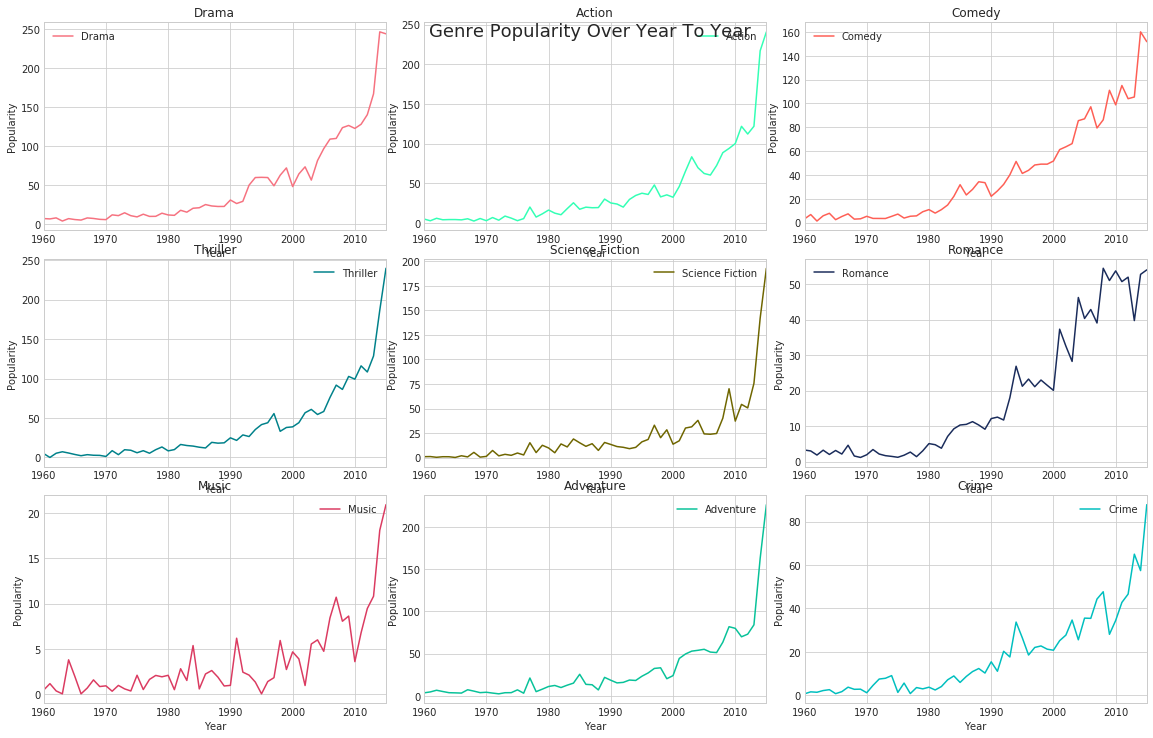

In [33]:
#How the popularity of the genre differ year by year.
sns.set_style("whitegrid")
#make a subplot of size 3,3.
fig, axs = plt.subplots(3,3,figsize = (16,10))

#set the title of the subplot.
fig.suptitle('Genre Popularity Over Year To Year',fontsize = 18)
fig.tight_layout(pad=5.0)
#plot the 'Drama' genre plot see the popularity difference over year to year.
popularity_df.loc['Drama'].plot(label = "Drama",color = '#f67280',ax = axs[0][0],legend=True)
axs[0][0].set_title('Drama')
axs[0][0].set_xlabel('Year')
axs[0][0].set_ylabel('Popularity')

#plot the 'Action' genre plot see the popularity difference over year to year.
popularity_df.loc['Action'].plot(label = "Action",color='#33FFB5',ax = axs[0][1],legend=True)
axs[0][1].set_title('Action')
axs[0][1].set_xlabel('Year')
axs[0][1].set_ylabel('Popularity')

#plot the 'Comedy' genre plot see the popularity difference over year to year.
popularity_df.loc['Comedy'].plot(label = "Comedy",color='#fe5f55',ax = axs[0][2],legend=True)
axs[0][2].set_title('Comedy')
axs[0][2].set_xlabel('Year')
axs[0][2].set_ylabel('Popularity')

#accordig to the previous plot the 'Thriller','Science Fiction', 'Romance', 'Music','Adventure' and 'Crime'.
popularity_df.loc['Thriller'].plot(label = "Thriller",color='#00818a',ax = axs[1][0],legend=True)
axs[1][0].set_title('Thriller')
axs[1][0].set_xlabel('Year')
axs[1][0].set_ylabel('Popularity')
popularity_df.loc['Science Fiction'].plot(label = "Science Fiction",color='#6f6600',ax = axs[1][1],legend=True)
axs[1][1].set_title('Science Fiction')
axs[1][1].set_xlabel('Year')
axs[1][1].set_ylabel('Popularity')
popularity_df.loc['Romance'].plot(label = "Romance",color='#1a2c5b',ax = axs[1][2],legend=True)
axs[1][2].set_title('Romance')
axs[1][2].set_xlabel('Year')
axs[1][2].set_ylabel('Popularity')
popularity_df.loc['Music'].plot(label = "Music",color='#db3b61',ax = axs[2][0],legend=True)
axs[2][0].set_title('Music')
axs[2][0].set_xlabel('Year')
axs[2][0].set_ylabel('Popularity')
popularity_df.loc['Adventure'].plot(label = "Adventure",color='#08c299',ax = axs[2][1],legend=True)
axs[2][1].set_title('Adventure')
axs[2][1].set_xlabel('Year')
axs[2][1].set_ylabel('Popularity')
popularity_df.loc['Crime'].plot(label = "Crime",color='c',ax = axs[2][2],legend=True)
axs[2][2].set_title('Crime')
axs[2][2].set_xlabel('Year')
axs[2][2].set_ylabel('Popularity')

### Research Question 2 What kinds of properties are associated with movies that have high revenues?

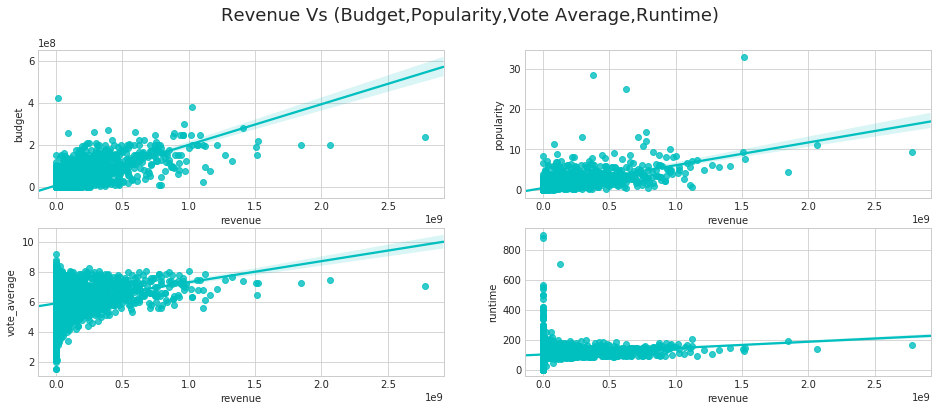

In [19]:
#make visuals for revenue with other properties and get the correlation between them.
sns.set_style("whitegrid")
fig, axs = plt.subplots(2,2,figsize = (16,6))
fig.suptitle("Revenue Vs (Budget,Popularity,Vote Average,Runtime)",fontsize=18)
sns.regplot(x=df['revenue'], y=df['budget'],color='c',ax=axs[0][0])
sns.regplot(x=df['revenue'], y=df['popularity'],color='c',ax=axs[0][1])
sns.regplot(x=df['revenue'], y=df['vote_average'],color='c',ax=axs[1][0])
sns.regplot(x=df['revenue'], y=df['runtime'],color='c',ax=axs[1][1])

In [20]:
#the correlation between properties.
df.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
id,1.000000,-0.009464,-0.138935,-0.097424,-0.083996,-0.032767,-0.071896,0.510385
popularity,-0.009464,1.000000,0.544240,0.662843,0.138278,0.800619,0.217906,0.093044
budget,-0.138935,0.544240,1.000000,0.734487,0.192168,0.632074,0.087318,0.119004
revenue,-0.097424,0.662843,0.734487,1.000000,0.164276,0.790889,0.178477,0.059072
runtime,-0.083996,0.138278,0.192168,0.164276,1.000000,0.164966,0.177276,-0.119286
vote_count,-0.032767,0.800619,0.632074,0.790889,0.164966,1.000000,0.260554,0.110317
vote_average,-0.071896,0.217906,0.087318,0.178477,0.177276,0.260554,1.000000,-0.127746
release_year,0.510385,0.093044,0.119004,0.059072,-0.119286,0.110317,-0.127746,1.000000


> **Observation**
* As we can see from there is a strong correlation between revenue and budget it means high budget equel high revenue.
* There are also a correlation between revenue and popularity but not much like budget.
* boor and low correlation between revenue and vote_average and runtime.

<a id='conclusions'></a>
## Conclusions
> **Results:**
* Drama is the most popular genre, followed by action, comedy, and thriller.
* Movies with higher budgets have shown a corresponding revenue increase followed by popularity. 

> **limitations:**
* During the data cleaning process, I split the data separated by '|' into lists for easy parsing during the exploration phase. This increases the time taken to calculate the result.
